In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Celem analizy jest sprawdzenie z punktu widzenia agencji z jakimi wykononawcami warto podjac wspolprace, i/lub na jakie cechy utworow/gatunki warto zwracach uwage przy wyborze wykonawcy dla odniesienia sukcesu

In [3]:
plik1 = pd.read_csv("Database to calculate popularity.csv")
plik2 = pd.read_csv("Final database.csv")

C:\Users\bozen\AppData\Local\Temp\ipykernel_23684\3232102807.py:2: DtypeWarning: Columns (7,8,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  plik2 = pd.read_csv("Final database.csv")


In [4]:
plik1.head()

,Unnamed: 0,country,date,position,uri,track,title,artist
0,0,Global,05/11/2020,1.0,https://open.spotify.com/track/47EiUVwUp4C9fGc...,"Dakiti , Bad Bunny, Jhay Cortez",Dakiti,"Bad Bunny, Jhay Cortez"
1,1,Global,05/11/2020,2.0,https://open.spotify.com/track/35mvY5S1H3J2QZy...,"positions , Ariana Grande",positions,Ariana Grande
2,2,Global,05/11/2020,3.0,https://open.spotify.com/track/3tjFYV6RSFtuktY...,"Mood , 24kGoldn",Mood,24kGoldn
3,3,Global,05/11/2020,4.0,https://open.spotify.com/track/7hxHWCCAIIxFLCz...,"Lemonade , Internet Money",Lemonade,Internet Money
4,4,Global,05/11/2020,5.0,https://open.spotify.com/track/4y4spB9m0Q6026K...,"Lonely , Justin Bieber",Lonely,Justin Bieber


In [5]:
plik2.head()

,Country,Uri,Popularity,Title,Artist,Album/Single,Genre,Artist_followers,Explicit,Album,...,Sweden,Switzerland,Taiwan,Turkey,UK,USA,Popu_max,Top10_dummy,Top50_dummy,Cluster
0,Global,https://open.spotify.com/track/6FyRXC8tJUh863J...,31833.95,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0,0,0,0,0,0,10,1.0,1.0,global
1,USA,https://open.spotify.com/track/6FyRXC8tJUh863J...,8.00,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0,0,0,0,0,1,191,0.0,0.0,english speaking and nordic
2,Argentina,https://open.spotify.com/track/6FyRXC8tJUh863J...,76924.40,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0,0,0,0,0,0,1,1.0,1.0,spanish speaking
3,Belgium,https://open.spotify.com/track/6FyRXC8tJUh863J...,849.60,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0,0,0,0,0,0,126,0.0,0.0,english speaking and nordic
4,Switzerland,https://open.spotify.com/track/6FyRXC8tJUh863J...,20739.10,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0,1,0,0,0,0,21,0.0,1.0,english speaking and nordic


In [6]:
plik1.isnull().sum()


Unnamed: 0        0
country           1
date              1
position          1
uri               1
track             1
title             1
artist        15642
dtype: int64

In [7]:
plik1['artist'] = plik1['artist'].fillna('nieznany')

In [8]:
plik1.isnull().sum()

Unnamed: 0    0
country       1
date          1
position      1
uri           1
track         1
title         1
artist        0
dtype: int64

In [9]:
plik1['country'] = plik1['country'].fillna('nieznany')
plik1['date'] = plik1['date'].fillna('nieznana')
plik1['position'] = plik1['position'].fillna(0) 
plik1['uri'] = plik1['uri'].fillna('nieznany')
plik1['track'] = plik1['track'].fillna('nieznany')
plik1['title'] = plik1['title'].fillna('nieznany')


In [10]:

plik2.isnull().sum()

Country        0
Uri            0
Popularity     0
Title          0
Artist         0
              ..
USA            0
Popu_max       0
Top10_dummy    0
Top50_dummy    0
Cluster        0
Length: 151, dtype: int64

In [11]:
#1 trend popularnosci artstow
# wniosek: stakeholderzy powinni sie skupiac na artystach utrzymujacych pozycje lub stale rosnacych w popularnosc

In [12]:
plik1['date'] = pd.to_datetime(plik1['date'], dayfirst=True, errors='coerce')
trendy_artystow = plik1.groupby([plik1['date'].dt.year, 'artist'])['position'].sum().unstack().fillna(0)


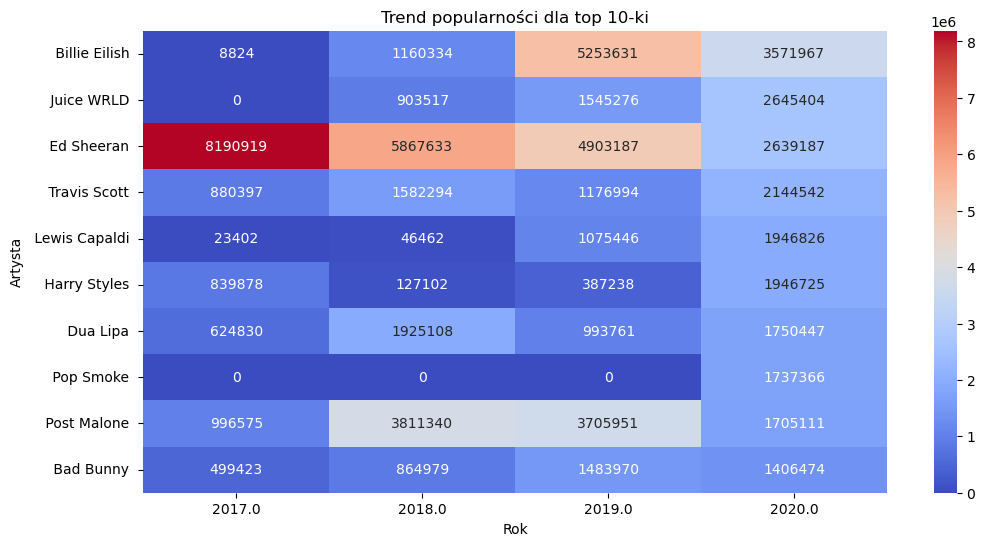

In [13]:
artist_trend = trendy_artystow

plt.figure(figsize=(12, 6))
sns.heatmap(artist_trend.T.sort_values(by=2020, ascending=False).head(10), cmap="coolwarm", annot=True, fmt=".0f")
plt.xlabel("Rok")
plt.ylabel("Artysta")
plt.title("Trend popularności dla top 10-ki")
plt.show()

In [14]:
#2 sprawdzenie trendow w popularnosci utworow
# wniosek: najwieksze skupienie utworow zakresie 0-20000, nalezy przeanalizowac cechy nielicznych utworow powyzej 20000

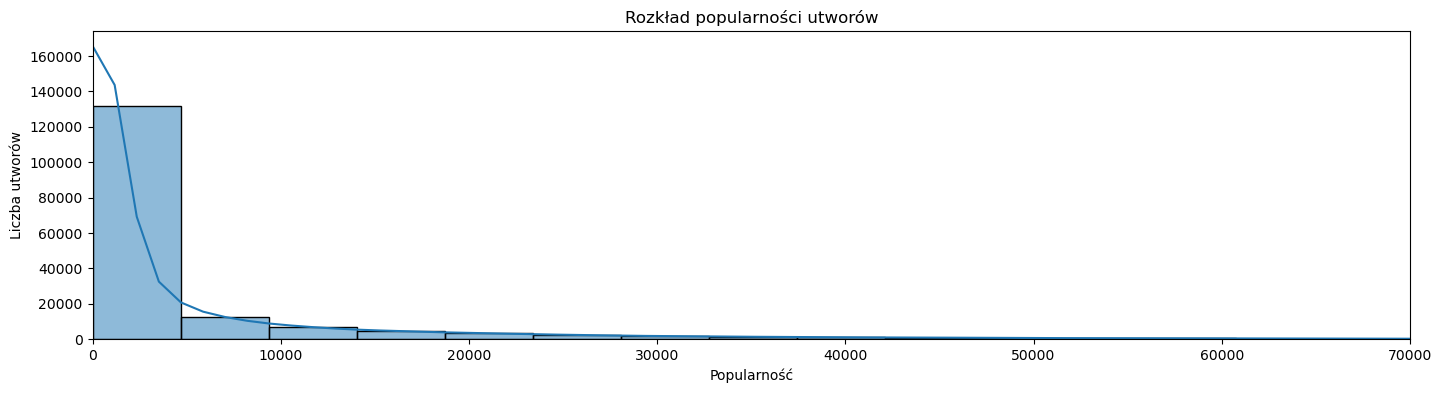

In [15]:
plt.figure(figsize=(17, 4))
ax = sns.histplot(plik2['Popularity'], kde=True, bins=50)
ax.set_xlim(0, 70000)
plt.title('Rozkład popularności utworów')
plt.xlabel('Popularność')
plt.ylabel('Liczba utworów')
plt.show()

In [16]:
#3 popularnosc w zaleznosci od miesiaca wydania utworu
# wniosek: najwieksza popularnosc w miesiacach letnich po 2016 (festiwale, typowe letnie przeboje), i zimowych (???swieta->chinski nowy rok i boze narodzenie)

In [17]:

plik2['month'] = pd.to_datetime(plik2['Release_date'], errors='coerce').dt.month


popularnosc_mies = plik2.groupby('month')['Popularity'].mean()


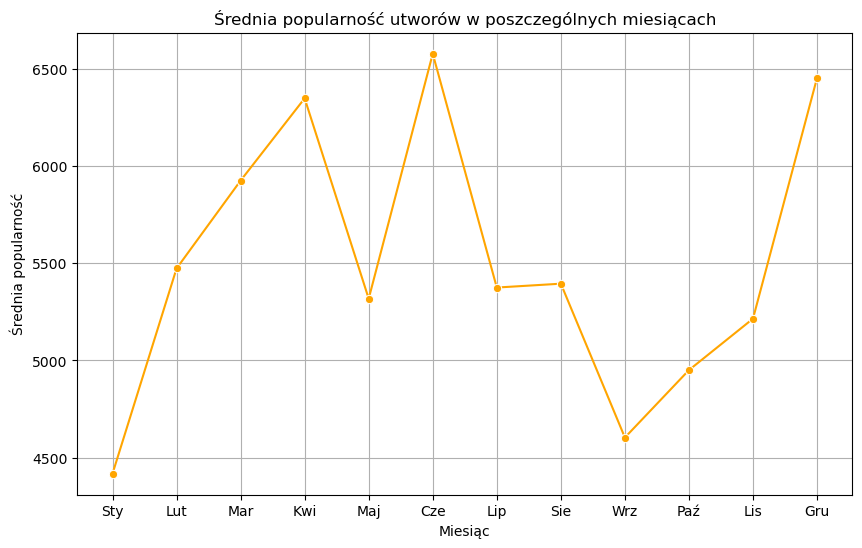

In [18]:


plt.figure(figsize=(10, 6))
sns.lineplot(x=popularnosc_mies.index, y=popularnosc_mies.values, marker='o', color='orange')
plt.title('Średnia popularność utworów w poszczególnych miesiącach')
plt.xlabel('Miesiąc')
plt.ylabel('Średnia popularność')
plt.xticks(ticks=range(1, 13), labels=['Sty', 'Lut', 'Mar', 'Kwi', 'Maj', 'Cze', 'Lip', 'Sie', 'Wrz', 'Paź', 'Lis', 'Gru'])
plt.grid(True) 
plt.show()

In [19]:
plik2['year'] = pd.to_datetime(plik2['Release_date'], errors='coerce').dt.year


plik2['month'] = pd.to_datetime(plik2['Release_date'], errors='coerce').dt.month


plik2_filtered = plik2[plik2['year'].isin([2005, 2010, 2015, 2018, 2019, 2020])]


popularnosc_mies_rok = plik2_filtered.groupby(['year', 'month'])['Popularity'].mean().reset_index()


In [20]:
#plik2['year'] = pd.to_datetime(plik2['Release_date'], errors='coerce').dt.year


#plik2['month'] = pd.to_datetime(plik2['Release_date'], errors='coerce').dt.month


#plik2_filtered = plik2[plik2['year'].isin([2015, 2016, 2017, 2018, 2019, 2020])]


#popularnosc_mies_rok = plik2_filtered.groupby(['year', 'month'])['Popularity'].mean().reset_index()

#plt.figure(figsize=(14, 8))
#sns.lineplot(x='month', y='Popularity', hue='year', data=popularnosc_mies_rok, marker='o')
#plt.xlabel('miesiac')
#plt.ylabel('srednia popularnosc')
#plt.legend(title='rok')
#plt.xticks(range(1, 13), ['Sty', 'Lut', 'Mar', 'Kwi', 'Maj', 'Cze', 'Lip', 'Sie', 'Wrz', 'Paź', 'Lis', 'Gru'])
#plt.show()


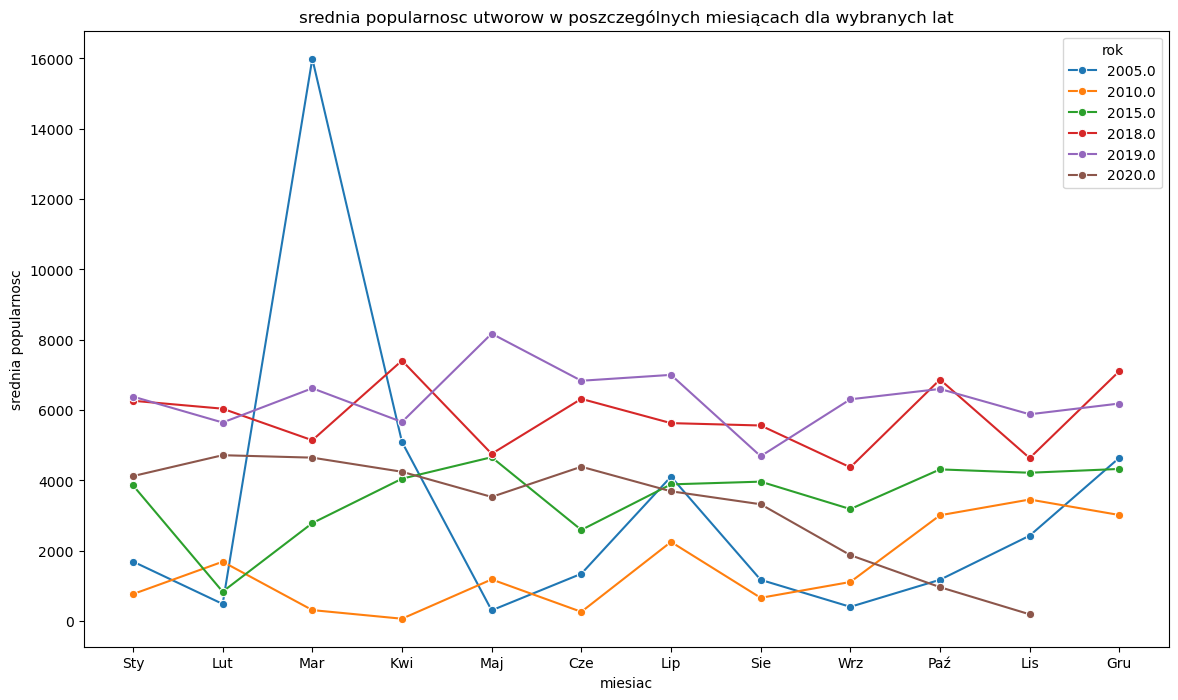

In [21]:


plt.figure(figsize=(14, 8))
sns.lineplot(x='month', y='Popularity', hue='year', data=popularnosc_mies_rok, marker='o', palette='tab10')
plt.title('srednia popularnosc utworow w poszczególnych miesiącach dla wybranych lat')
plt.xlabel('miesiac')
plt.ylabel('srednia popularnosc')
plt.legend(title='rok')
plt.xticks(range(1, 13), ['Sty', 'Lut', 'Mar', 'Kwi', 'Maj', 'Cze', 'Lip', 'Sie', 'Wrz', 'Paź', 'Lis', 'Gru'])
plt.show()

In [22]:
#heatmap_data = popularnosc_mies_rok.pivot(index='year', columns='month', values='Popularity')


#plt.figure(figsize=(12, 8))
#sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlOrRd", linewidths=.5)
#plt.title('Średnia popularność utworów w poszczególnych miesiącach dla wybranych lat')
#plt.xlabel('Miesiąc')
#plt.ylabel('Rok')
#plt.xticks(ticks=range(12), labels=['Sty', 'Lut', 'Mar', 'Kwi', 'Maj', 'Cze', 'Lip', 'Sie', 'Wrz', 'Paź', 'Lis', 'Gru'])
#plt.yticks(rotation=0)  # Aby etykiety lat były poziome
#plt.show()

In [23]:
#3-1 sprawdzenie hitow z grudnia

In [24]:
print(plik2.columns)

plik2['month'] = pd.to_datetime(plik2['Release_date'], errors='coerce').dt.month
plik2['year'] = pd.to_datetime(plik2['Release_date'], errors='coerce').dt.year


plik2_grudz = plik2[plik2['month'].isin([12])]


pop_utwory = plik2_grudz.groupby(['month', 'Title', 'Release_date'])['Popularity'].mean().reset_index()


top_30_gru = pop_utwory[pop_utwory['month'] == 12].sort_values(by='Popularity', ascending=False).head(30)


print("\n topka utworów w grudniu:")
print(top_30_gru[['Title', 'Popularity', 'Release_date']])

Index(['Country', 'Uri', 'Popularity', 'Title', 'Artist', 'Album/Single',
       'Genre', 'Artist_followers', 'Explicit', 'Album',
       ...
       'Taiwan', 'Turkey', 'UK', 'USA', 'Popu_max', 'Top10_dummy',
       'Top50_dummy', 'Cluster', 'month', 'year'],
      dtype='object', length=153)

 topka utworów w grudniu:
                                Title     Popularity Release_date
2704                          tadhana  172546.350000   2012-12-07
1429                           kangen  145597.300000   2014-12-03
3579                               體面  107183.450000   2017-12-25
3531                          讓我留在你身邊  105699.550000   2016-12-01
3318                            如果雨之後   94793.533333   2017-12-15
3466                             玫瑰少年   90356.350000   2018-12-25
3249                             光年之外   88236.233333   2016-12-30
1919                         nadarang   85806.450000   2017-12-08
3229                           以後別做朋友   82317.533333   2014-12-19
2283               

In [25]:
#4 followersi a popularnosc utworow wykonawcy
# wniosek: brak zaleznosci pomiedzy liczba followersow artysty a popularnoscia utworow, liczba followersow przy wyborze artystow do wspolpracy ma minimalny wplyw

In [26]:
plik1.columns


Index(['Unnamed: 0', 'country', 'date', 'position', 'uri', 'track', 'title',
       'artist'],
      dtype='object')

In [27]:

plik2.columns

Index(['Country', 'Uri', 'Popularity', 'Title', 'Artist', 'Album/Single',
       'Genre', 'Artist_followers', 'Explicit', 'Album',
       ...
       'Taiwan', 'Turkey', 'UK', 'USA', 'Popu_max', 'Top10_dummy',
       'Top50_dummy', 'Cluster', 'month', 'year'],
      dtype='object', length=153)

In [28]:

plik2['Artist_followers'] = pd.to_numeric(plik2['Artist_followers'], errors='coerce')
plik2['Popularity'] = pd.to_numeric(plik2['Popularity'], errors='coerce')


In [29]:
plik2.dropna(subset=['Artist_followers', 'Popularity'], inplace=True)
correlation_artist = plik2['Artist_followers'].corr(plik2['Popularity'])

In [30]:
from scipy.stats import pearsonr


In [31]:
artysta_popularnosc = plik2[['Artist_followers', 'Popularity']].dropna()

correlation, p_value = pearsonr(artysta_popularnosc['Artist_followers'], artysta_popularnosc['Popularity'])
print(f"korelacja: {correlation:.4f}")
print(f"p-value: {p_value:.4f}")


korelacja: 0.0793
p-value: 0.0000


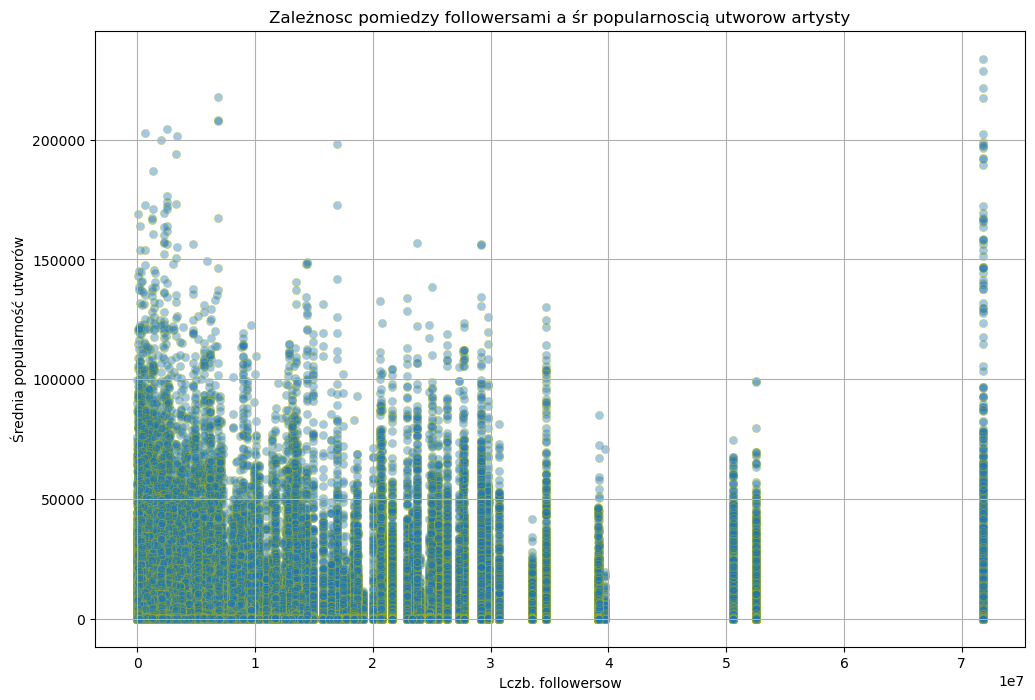

In [32]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Artist_followers', y='Popularity', data=artysta_popularnosc, alpha=0.4, edgecolor='y')
plt.title('Zależnosc pomiedzy followersami a śr popularnoscią utworow artysty')
plt.xlabel('Lczb. followersow')
plt.ylabel('Średnia popularność utworów')
plt.grid(True)

plt.show()

In [33]:
#5-1 cechy utworu vs popularnosc- Valence (musical positiveness conveyed by a track)
# wniosek: brak znacznej zaleznosci ( wiekszosc utowrow ma niska popularnosc bez znaczenia do wskaznika valence)

In [34]:
plik1.columns

Index(['Unnamed: 0', 'country', 'date', 'position', 'uri', 'track', 'title',
       'artist'],
      dtype='object')

In [35]:
print(plik2.head())

       Country                                                Uri  Popularity  \
0       Global  https://open.spotify.com/track/6FyRXC8tJUh863J...    31833.95   
1          USA  https://open.spotify.com/track/6FyRXC8tJUh863J...        8.00   
2    Argentina  https://open.spotify.com/track/6FyRXC8tJUh863J...    76924.40   
3      Belgium  https://open.spotify.com/track/6FyRXC8tJUh863J...      849.60   
4  Switzerland  https://open.spotify.com/track/6FyRXC8tJUh863J...    20739.10   

        Title        Artist Album/Single              Genre  Artist_followers  \
0  adan y eva  Paulo Londra       single  argentine hip hop        11427104.0   
1  adan y eva  Paulo Londra       single  argentine hip hop        11427104.0   
2  adan y eva  Paulo Londra       single  argentine hip hop        11427104.0   
3  adan y eva  Paulo Londra       single  argentine hip hop        11427104.0   
4  adan y eva  Paulo Londra       single  argentine hip hop        11427104.0   

  Explicit       Album  ..

In [36]:

plik2['valence'] = pd.to_numeric(plik2['valence'], errors='coerce')
plik2['Popularity'] = pd.to_numeric(plik2['Popularity'], errors='coerce')


In [37]:

plik2.dropna(subset=['valence', 'Popularity'], inplace=True)



In [38]:

correlation, p_value = pearsonr(plik2['valence'], plik2['Popularity'])
print(f"orelacja: {correlation:.2f}")
print(f"p-value: {p_value:.4f}")

orelacja: 0.06
p-value: 0.0000


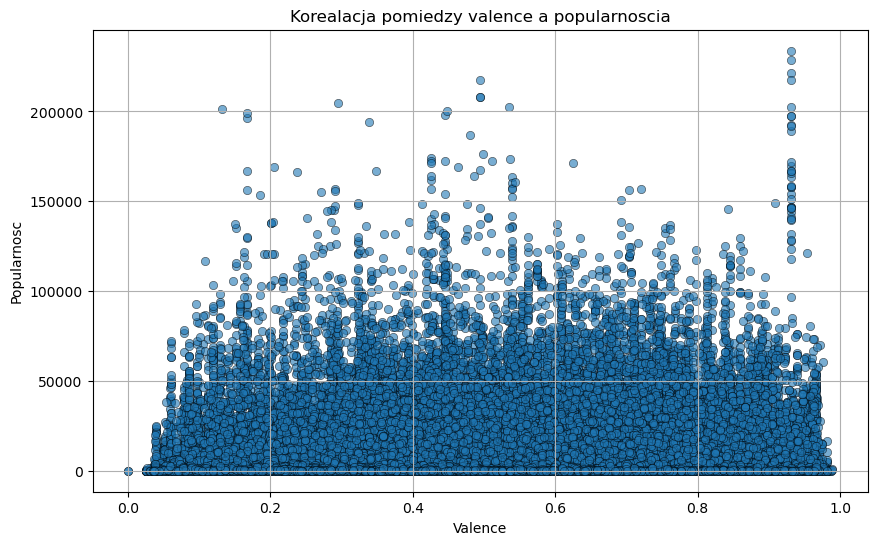

In [39]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='valence', y='Popularity', data=plik2, alpha=0.6, edgecolor='k')
plt.title('Korealacja pomiedzy valence a popularnoscia')
plt.xlabel('Valence')
plt.ylabel('Popularnosc')
plt.grid(True)
plt.show()

In [40]:
#5-2 cechy utworu vs popularnosc- Explicit
# wniosek: utory oznaczone jako 'nie explicit' bardziej popularne, na takich utworach warto sie skupic

In [41]:
plik2.dropna(subset=['Explicit', 'Popularity'], inplace=True)


explicit = plik2[plik2['Explicit'] == True]['Popularity']
not_explicit = plik2[plik2['Explicit'] == False]['Popularity']
mean_explicit = explicit.mean()
mean_not_explicit = not_explicit.mean()

print(f"avg popularnosc explicit: {mean_explicit:.2f}")
print(f"avg popularnosc nie-explicit: {mean_not_explicit:.2f}")



avg popularnosc explicit: 4493.81
avg popularnosc nie-explicit: 6011.04


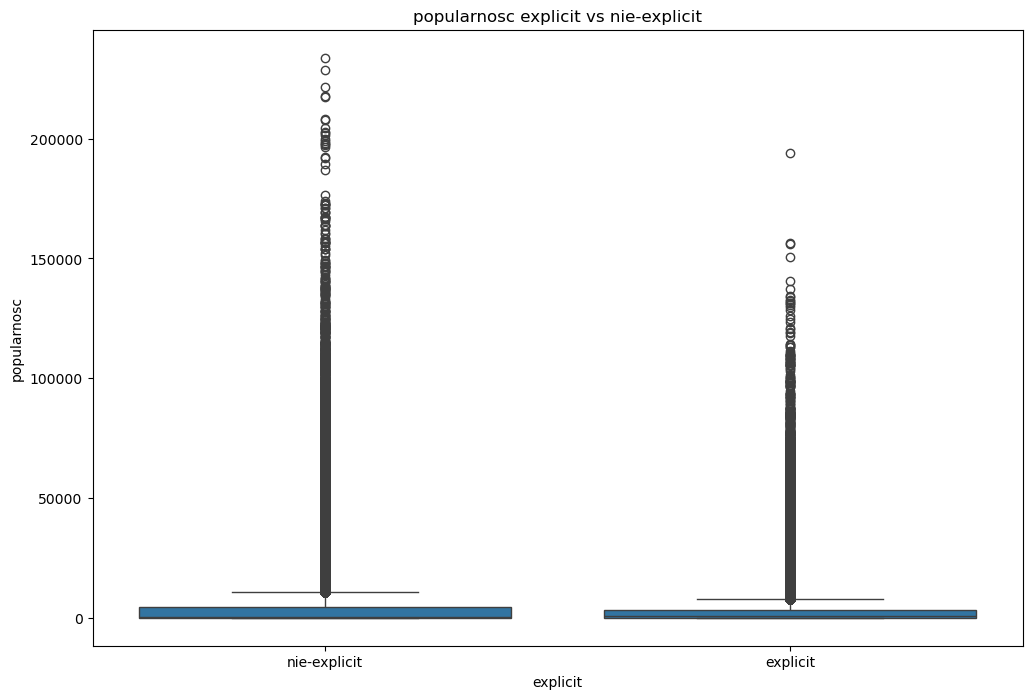

In [42]:

plt.figure(figsize=(12, 8))
sns.boxplot(x='Explicit', y='Popularity', data=plik2)
plt.title('popularnosc explicit vs nie-explicit')
plt.xlabel('explicit')
plt.ylabel('popularnosc')
plt.xticks([0, 1], ['nie-explicit', 'explicit']) 
plt.show()

In [43]:
#5-3  10 gatunków muzycznych o najwyższej medianie popularności
# wniosek: dobrym wyborem bedzie sad rap, turkish trap lub np. nuevo regional mexicano


In [44]:
plik2.dropna(subset=['Genre', 'Popularity'], inplace=True)

mean_pop_gatunek = plik2.groupby('Genre')['Popularity'].median().sort_values(ascending=False).head(10)
print("10 gatunków muzycznych o najwyższej medianie popularności:")
print(mean_pop_gatunek)

10 gatunków muzycznych o najwyższej medianie popularności:
Genre
azonto                     41581.050
sad rap                    30985.250
nuevo regional mexicano    30097.250
argentine heavy metal      25938.400
indie rockism              25504.250
russian pop                23352.225
armenian pop               22699.350
chihuahua indie            21677.300
graz indie                 17771.500
turkish trap               15963.050
Name: Popularity, dtype: float64


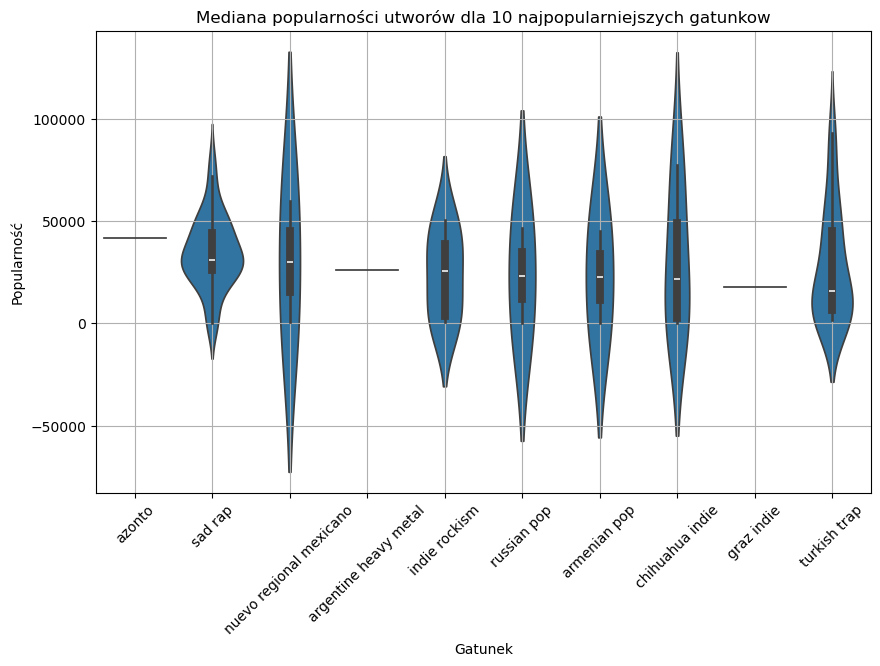

In [45]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Genre', y='Popularity', data=plik2, order=mean_pop_gatunek.index)
plt.title('Mediana popularności utworów dla 10 najpopularniejszych gatunkow')
plt.xlabel('Gatunek')
plt.ylabel('Popularność')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [46]:
#mala liczba utworow lda kiku gatunkow-niemiarodajne 
#+popularnosc na minusie

In [47]:
plik2 = plik2[plik2['Popularity'] >= 0]

plik2['Popularity'] = plik2['Popularity'].apply(lambda x: max(x, 0))

In [48]:
negatywne_popularnosci = plik2[plik2['Popularity'] < 0]

print(negatywne_popularnosci)

Empty DataFrame
Columns: [Country, Uri, Popularity, Title, Artist, Album/Single, Genre, Artist_followers, Explicit, Album, Release_date, Track_number, Tracks_in_album, danceability, energy, key, loudness, mode, speechiness, acoustics, instrumentalness, liveliness, valence, tempo, duration_ms, time_signature, Genre_new, Days_since_release, Released_after_2017, Explicit_false, Explicit_true, album, compilation, single, bolero, boy band, country, dance/electronic, else, funk, hip hop, house, indie, jazz, k-pop, latin, metal, opm, pop, r&b/soul, rap, reggae, reggaeton, rock, trap, syuzhet_norm, bing_norm, afinn_norm, nrc_norm, syuzhet, bing, afinn, nrc, anger, anticipation, disgust, fear, joy, sadness, surprise, trust, negative, positive, n_words, anger_norm, anticipation_norm, disgust_norm, fear_norm, joy_norm, sadness_norm, surprise_norm, trust_norm, negative_norm, positive_norm, anger_norm2, anticipation_norm2, disgust_norm2, fear_norm2, joy_norm2, sadness_norm2, surprise_norm2, trust_n

In [49]:
print(plik2['Popularity'].describe())

count    170573.000000
mean       5418.775018
std       13117.670875
min           0.800000
25%          77.600000
50%         515.200000
75%        3868.600000
max      233766.900000
Name: Popularity, dtype: float64


In [50]:
print(plik2['Popularity'].min())

0.8


In [51]:
plik2 = plik2[plik2['Popularity'] >= 0].copy()

In [52]:
plik2['Popularity'] = plik2['Popularity'].apply(lambda x: max(x, 0))

In [53]:
print(plik2['Popularity'].describe())

count    170573.000000
mean       5418.775018
std       13117.670875
min           0.800000
25%          77.600000
50%         515.200000
75%        3868.600000
max      233766.900000
Name: Popularity, dtype: float64


In [54]:
top_gatunki = plik2.groupby("Genre")["Popularity"].median().sort_values(ascending=False).head(10).index

plik2_top = plik2[plik2["Genre"].isin(top_gatunki)]
gatunek = (plik2_top['Genre'].str.split(', ').explode().value_counts())

popularne_gatunki = gatunek[gatunek > 10]
najpopularniejszy = popularne_gatunki.idxmax()
liczba_utworow = popularne_gatunki.max()

print(f"Najpopularniejszy gatunek (liczba utworów >10): {najpopularniejszy}")
print(f"Liczba utworów: {liczba_utworow}")
print("\nWszystkie gatunki z liczbą utworów >=10:")
print(popularne_gatunki.to_string())

Najpopularniejszy gatunek (liczba utworów >10): sad rap
Liczba utworów: 38

Wszystkie gatunki z liczbą utworów >=10:
Genre
sad rap         38
turkish trap    22


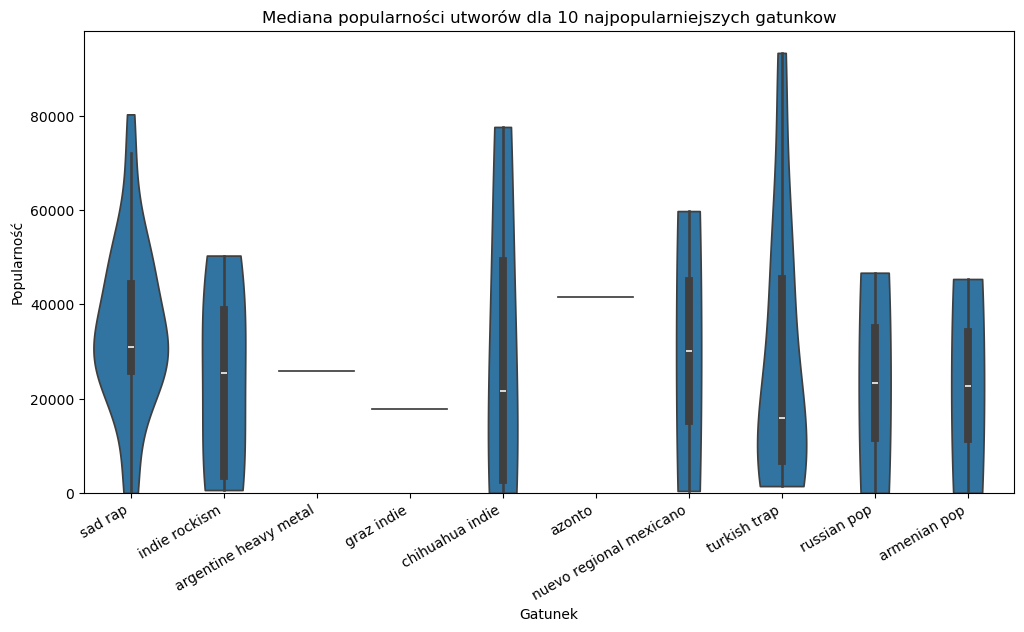

In [55]:
top_gatunki = (plik2.groupby("Genre")["Popularity"].median().sort_values(ascending=False).head(10).index)
plik2_top = plik2[plik2["Genre"].isin(top_gatunki)]


plt.figure(figsize=(12, 6))
sns.violinplot(x="Genre", y="Popularity", data=plik2_top, cut=0)
plt.xticks(rotation=30, ha="right")
plt.ylim(0, None)
plt.xlabel('Gatunek')
plt.ylabel('Popularność')
plt.title('Mediana popularności utworów dla 10 najpopularniejszych gatunkow')
plt.show()




In [56]:
#5-3 top 10 gatunkow wg liczby utworow
# wniosek: najwieksza liczba utworow zyskujacych populalarnosc w gatunku pop, na takim gatunku warto sie skupic

In [57]:
med_pop_gatunek = plik2.groupby('Genre')['Popularity'].median().sort_values(ascending=False).head(10)

set_popularnosc = set(med_pop_gatunek.index) 
set_liczba = set(plik2['Genre'].value_counts().head(10).index)

print("gatunki w  10 wg popularności:", set_popularnosc - set_liczba)
print("gatunki w 10 wg liczby utworów:", set_liczba - set_popularnosc)

gatunki w  10 wg popularności: {'argentine heavy metal', 'russian pop', 'azonto', 'turkish trap', 'graz indie', 'nuevo regional mexicano', 'indie rockism', 'sad rap', 'armenian pop', 'chihuahua indie'}
gatunki w 10 wg liczby utworów: {'big room', 'atl hip hop', 'k-pop', 'n-a', 'latin', 'german hip hop', 'dutch hip hop', 'pop', 'francoton', 'dance pop'}


In [58]:
top_gatunek = plik2['Genre'].value_counts().head(10).index
plik2_top_gatunek = plik2[plik2['Genre'].isin(top_gatunek)]


C:\Users\bozen\AppData\Local\Temp\ipykernel_23684\858539803.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Genre', y='Popularity', data=plik2_top_gatunek, order=top_gatunek, palette='viridis')


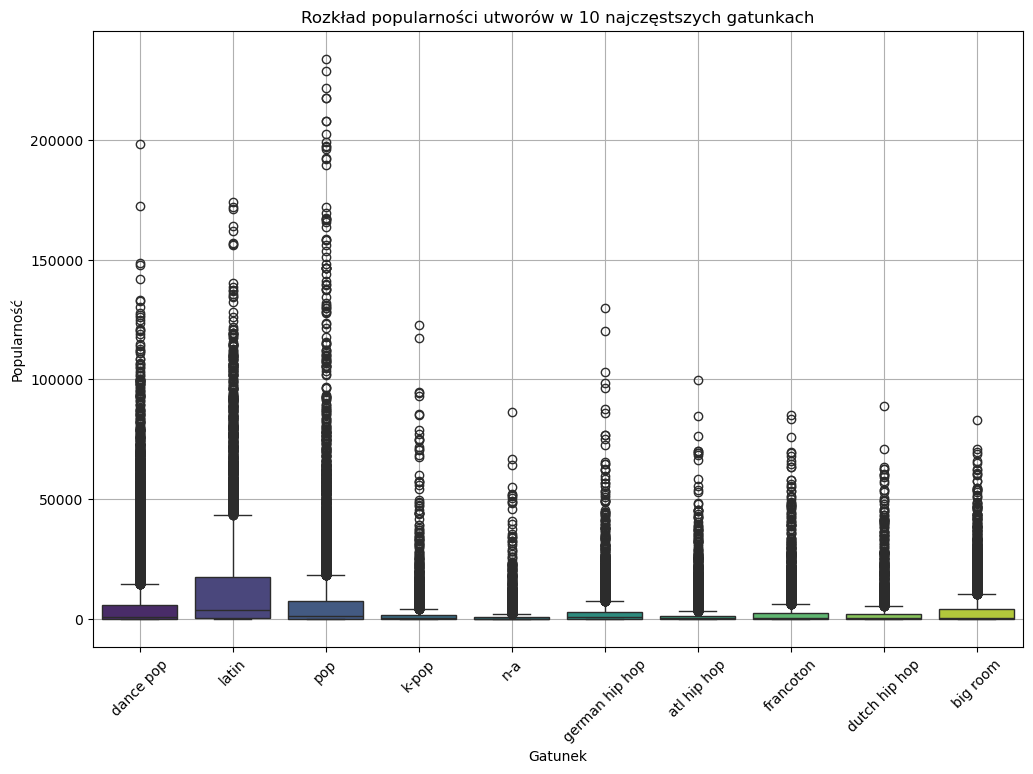

In [59]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Genre', y='Popularity', data=plik2_top_gatunek, order=top_gatunek, palette='viridis')
plt.title('Rozkład popularności utworów w 10 najczęstszych gatunkach')
plt.xlabel('Gatunek')
plt.ylabel('Popularność')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [60]:
#6 topka 10 wykonawcow swiatowych
#wnioski:  agencja powinna nawiazywac wspolprace z najpopularniejszymi wykonawcami swiatowymi, lub skupic sie na rokujacych wykonawcach ktorzy tworza w podobnym stylu muzycznym

In [61]:
swiatowi_artysci = plik1['artist'].value_counts().head(10)

plik1['artist'].value_counts().head(10)

artist
Ed Sheeran          218331
Post Malone         109687
Billie Eilish       103108
Drake                83456
XXXTENTACION         81645
Imagine Dragons      75233
Dua Lipa             67698
Ariana Grande        62426
Shawn Mendes         56973
Travis Scott         55124
Name: count, dtype: int64

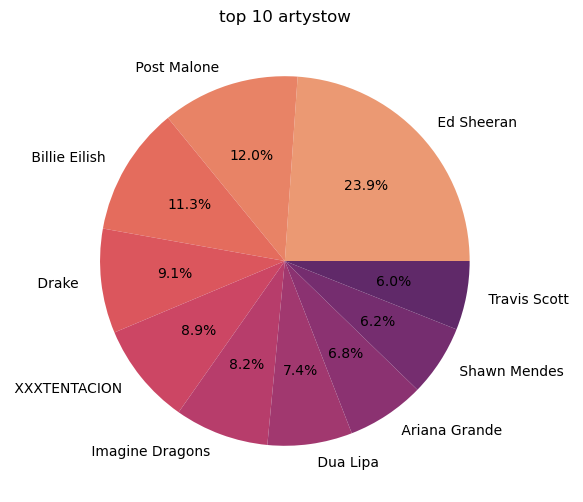

In [62]:
plt.figure(figsize=(12, 6))
plt.pie(swiatowi_artysci.values, labels=swiatowi_artysci.index, autopct='%1.1f%%', colors=sns.color_palette("flare", len(swiatowi_artysci)))
plt.title("top 10 artystow")
plt.show()

In [63]:
gatunki_ed_sheeran = plik2[plik2['Artist'] == 'Ed Sheeran']['Genre'].unique()


print("Gatunki Eda Sheeran:")
print(gatunki_ed_sheeran)

Gatunki Eda Sheeran:
['pop']


In [64]:
gatunki_Billie_Eilish = plik2[plik2['Artist'] == 'Billie Eilish']['Genre'].unique()


print("Gatunki Billie_Eilish:")
print(gatunki_Billie_Eilish)

Gatunki Billie_Eilish:
['electropop']


In [65]:
gatunki_Post_Malone = plik2[plik2['Artist'] == 'Post Malone']['Genre'].unique()

print("Gatunki Post Malone:")
print(gatunki_Post_Malone)

Gatunki Post Malone:
['dfw rap']


In [66]:
gatunki_Drake = plik2[plik2['Artist'] == 'Drake']['Genre'].unique()

print("Gatunki Drake:")
print(gatunki_Drake)

Gatunki Drake:
['canadian hip hop']


In [67]:
gatunki_Imagine_Dragons = plik2[plik2['Artist'] == 'Imagine Dragons']['Genre'].unique()

print("Gatunki Imagine_Dragons:")
print(gatunki_Imagine_Dragons)

Gatunki Imagine_Dragons:
['modern rock']
